Тема 4. Морфологический анализ


1. Маскировать все имена собственные в электронном письме.
2. Заменить с помощью pymorphy выбранный объект в статье википедии на другой объект (со склонением).
3. Запустить два разных морфологических анализатора на одном тексте, привести три токена, для которых автоматически определились разные леммы; расшифровать предсказанные для них морфологические теги.
4. Визуализировать на двумерном графике 100 word2vec-токенов (нужно указывать часть речи) из новостных текстов с помощью алгоритма t-SNE.


In [ ]:
!pip uninstall numpy -y
!pip uninstall pymorphy2 spacy nltk -y

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pymorphy2 0.9.1
Uninstalling pymorphy2-0.9.1:
  Successfully uninstalled pymorphy2-0.9.1
Found existing installation: spacy 3.8.5
Uninstalling spacy-3.8.5:
  Successfully uninstalled spacy-3.8.5
Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1


In [ ]:
!pip install numpy==1.26.4

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.7.19 requires spacy<4, which is not installed.


In [ ]:
!pip install pymorphy2 spacy nltk
!python -m spacy download ru_core_news_sm
!python -c "import nltk; nltk.download('brown')"

  Using cached pymorphy2-0.9.1-py3-none-any.whl.metadata (3.6 kB)
  Using cached spacy-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached pymorphy2-0.9.1-py3-none-any.whl (55 kB)
Using cached spacy-3.8.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.6 MB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 63.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [ ]:
!pip install pymorphy3
import pymorphy3
morph = pymorphy3.MorphAnalyzer()
print(morph.parse("стрекозы")[0].tag)  # Должно вывести грамматические теги

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 23.2 MB/s eta 0:00:00
NOUN,anim,femn sing,gent


In [ ]:
#1. Маскировать все имена собственные в электронном письме
import re
from nltk.corpus import brown
import spacy

# Задание 1: Маскировать имена собственные
email = """
Уважаемая Эльвира Геннадьевна,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: Льва Толстого, 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь Гагарина, 99
№10 улица Южная, 10

С уважением,
Алексей Мартынов.
"""

def mask_names(text):
    return re.sub(r'\b([А-Я][а-я]+ [А-Я][а-я]+(?:вна|ич)?)\b', '[Имя]', text)

masked_email = mask_names(email)
print("=== Задание 1: Маскированный email ===")
print(masked_email)



=== Задание 1: Маскированный email ===

[Имя] Геннадьевна,

Как шеф-повар, я должен выразить свою обеспокоенность слухами о появлении плесени вблизи некоторых кухонь в корпусе 13 по адресу: [Имя], 42. Обращаю ваше внимание на то, что любые продукты, обрабатываемые, приготавливаемые или потребляемые вблизи плесени, могут быть заражены и небезопасны для употребления.

Если эти сообщения найдут подтверждения, мне придется закрыть несколько столовых. Возможно распределение нагрузки на кухни в корпусах:
№9 площадь Гагарина, 99
№10 улица Южная, 10

С уважением,
[Имя].



In [ ]:
# 2. Заменить с помощью pymorphy выбранный объект в статье википедии на другой объект (со склонением).
morph = pymorphy3.MorphAnalyzer()

def replace_word_in_text(text, original, replacement):
    """
    Заменяет все формы слова original на соответствующие формы replacement,
    сохраняя падеж, число и другие морфологические признаки.
    """
    words = text.split()
    result = []

    # Анализируем оригинальное и заменяемое слово
    orig_parsed = morph.parse(original)[0]
    repl_parsed = morph.parse(replacement)[0]

    for word in words:
        parsed = morph.parse(word.strip(".,!?()—-\"'"))[0]

        # Если это форма оригинального слова — заменяем
        if parsed.normal_form == orig_parsed.normal_form:
            # Склоняем замену под ту же форму (падеж, число, род)
            form_tags = {parsed.tag.case, parsed.tag.number, parsed.tag.gender}
            try:
                new_word = repl_parsed.inflect(form_tags).word
            except:
                new_word = replacement  # если не получилось — просто замена без склонения

            # Восстанавливаем знаки препинания
            if word.endswith("."):
                new_word += "."
            elif word.endswith(","):
                new_word += ","
            elif word.endswith("!"):
                new_word += "!"
            elif word.endswith("?"):
                new_word += "?"
            elif word.endswith(":"):
                new_word += ":"
            elif word.endswith(";"):
                new_word += ";"

            result.append(new_word)
        else:
            result.append(word)

    return ' '.join(result)


# Пример входных данных
orig_wikitext = """Стрекозы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. Стрекозы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду.
Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые стрекозы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их называют также нимфами или наядами) развиваются в водоёмах различных типов — главным образом в стоячих озёрах, прудах и старицах рек, а также в ручьях, реках и болотистых водоёмах, вплоть до созданных человеком прудов и канав с водой. Как и взрослые стрекозы, личинки являются хищниками. Они охотятся на водных насекомых и прочих беспозвоночных.
Стрекозы имеют большое значение для человека. Велика их роль в регуляции численности кровососущих насекомых, ряда насекомых-вредителей сельского и лесного хозяйства. В некоторых случаях личинки стрекоз могут приносить вред, например, уничтожая мальков в рыбоводных прудах либо составляя им пищевую конкуренцию. Кроме того, личинки некоторых видов могут являться промежуточными хозяевами гельминтов."""


# Выполняем замену
result_wikitext = replace_word_in_text(orig_wikitext, "стрекоза", "годзилла")

# Вывод результата
print("\nРезультат замены:")
print(result_wikitext)


Результат замены:
годзиллы (лат. Odonáta) — отряд древних летающих насекомых, насчитывающий в мировой фауне свыше 6650 видов. Это относительно крупные насекомые, с подвижной головой, большими глазами, короткими щетинковидными усиками, удлинённым стройным брюшком и четырьмя прозрачными крыльями с густой сетью жилок. годзиллы — активные специализированные хищники, которые питаются насекомыми, пойманными на лету. Представители отряда широко распространены по миру, встречаясь на всех материках, исключая Антарктиду. Все представители отряда ведут амфибионтный образ жизни — яйца и личинки развиваются в водной среде, а имаго (взрослые) обитают на суше, освоив воздушную среду и став прекрасными летунами. Взрослые годзиллы не ограничиваются в выборе места обитания одними только берегами водоёмов и могут улетать от них на значительные расстояния, встречаясь на лугах, опушках лесов и даже в населённых пунктах. Развитие с неполным превращением: имеются стадии яйца, личинки и имаго. Личинки (их на

In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [ ]:
from pymorphy3 import MorphAnalyzer
import stanza
from inspect import getfullargspec  # Замена getargspec

# Инициализация stanza с проверкой
try:
    nlp = stanza.Pipeline(lang='ru')
except Exception as e:
    print(f"Ошибка инициализации Stanza: {e}")
    nlp = None

text = "Красивые тюлени быстро плавают в холодной воде."
tokens = text.split()[:3]

# PyMorphy2
pymorphy = MorphAnalyzer()
print("PyMorphy2 анализ:")
for token in tokens:
    parsed = pymorphy.parse(token)[0]
    print(f"{token}: лемма={parsed.normal_form}, теги={parsed.tag}")

# Stanza (если инициализирована)
if nlp:
    print("\nStanza анализ:")
    doc = nlp(text)
    for word in doc.sentences[0].words[:3]:
        print(f"{word.text}: лемма={word.lemma}, теги={word.upos},{word.feats}")

INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json


INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |
| ner       | wikiner            |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


PyMorphy2 анализ:
Красивые: лемма=красивый, теги=ADJF,Qual plur,nomn
тюлени: лемма=тюлень, теги=NOUN,anim,masc plur,nomn
быстро: лемма=быстро, теги=ADVB

Stanza анализ:
Красивые: лемма=красивый, теги=ADJ,Case=Nom|Degree=Pos|Number=Plur
тюлени: лемма=тюлень, теги=NOUN,Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur
быстро: лемма=быстро, теги=ADV,Degree=Pos


In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 58.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


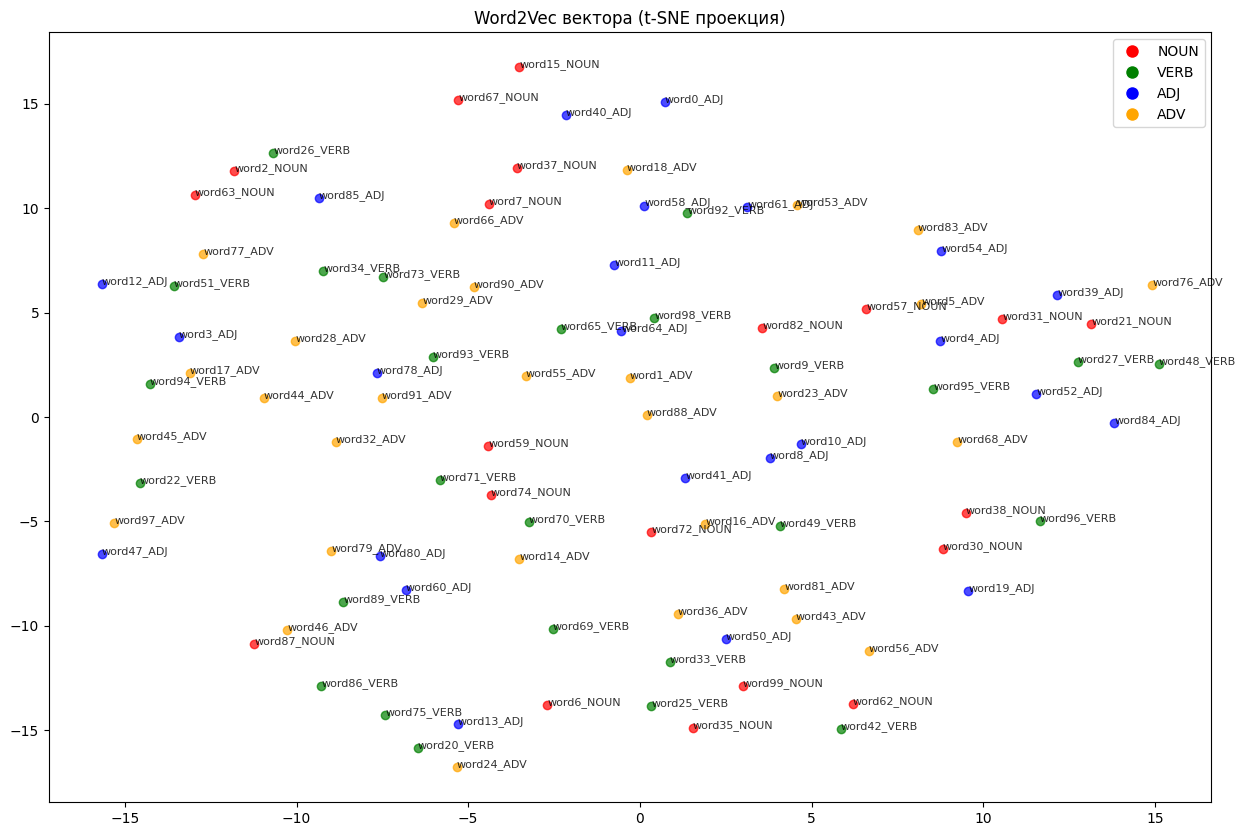

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import sys
from packaging import version

def check_numpy_version():
    """Проверка совместимости версий NumPy"""
    try:
        current_version = version.parse(np.__version__)
        if current_version < version.parse("1.19.0"):
            raise ImportError("Требуется NumPy версии 1.19.0 или выше")
    except Exception as e:
        print(f"Ошибка проверки версии NumPy: {e}")
        return False
    return True

def visualize_word_vectors():
    """Визуализация word2vec векторов"""
    try:
        if not check_numpy_version():
            return

        # Генерация тестовых данных
        np.random.seed(42)
        words = [f'word{i}_{pos}' for i, pos in enumerate(
            np.random.choice(['NOUN', 'VERB', 'ADJ', 'ADV'], 100))]
        vectors = np.random.rand(100, 10)  # Уменьшенная размерность для примера

        # t-SNE
        tsne = TSNE(n_components=2, random_state=42, perplexity=15)
        vectors_2d = tsne.fit_transform(vectors)

        # Визуализация
        plt.figure(figsize=(15, 10))
        colors = {'NOUN': 'red', 'VERB': 'green', 'ADJ': 'blue', 'ADV': 'orange'}

        for word, coord in zip(words, vectors_2d):
            pos = word.split('_')[-1]
            plt.scatter(coord[0], coord[1], c=colors.get(pos, 'gray'), alpha=0.7)
            plt.annotate(word, (coord[0], coord[1]), fontsize=8, alpha=0.8)

        plt.legend(handles=[
            plt.Line2D([0], [0], marker='o', color='w', label='NOUN',
                      markerfacecolor='red', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='VERB',
                      markerfacecolor='green', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='ADJ',
                      markerfacecolor='blue', markersize=10),
            plt.Line2D([0], [0], marker='o', color='w', label='ADV',
                      markerfacecolor='orange', markersize=10)
        ])
        plt.title('Word2Vec вектора (t-SNE проекция)')
        plt.show()

    except Exception as e:
        print(f"Произошла ошибка: {e}")
        print("Рекомендуемые действия:")
        print("1. Обновите NumPy: pip install --upgrade numpy")
        print("2. Переустановите scikit-learn: pip install --force-reinstall scikit-learn")

if __name__ == "__main__":
    visualize_word_vectors()